<a href="https://colab.research.google.com/github/0323ali/Machine-Learning/blob/main/detection_of_number_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1lZIGlwJnkJ80I5JVOpZ")
project = rf.workspace("burhan-khan").project("pk-number-plates")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pk-Number-Plates-3 in yolov8:: 100%|██████████| 3368/3368 [00:00<00:00, 6794.03it/s]


In [2]:
# Create data.yaml file in Colab
data_yaml = """
train: /content/Pk-Number-Plates-3/train
val: //content/Pk-Number-Plates-3/valid

nc: 1
names: ['Number-Plate']
"""

# Save it as 'data.yaml'
with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)


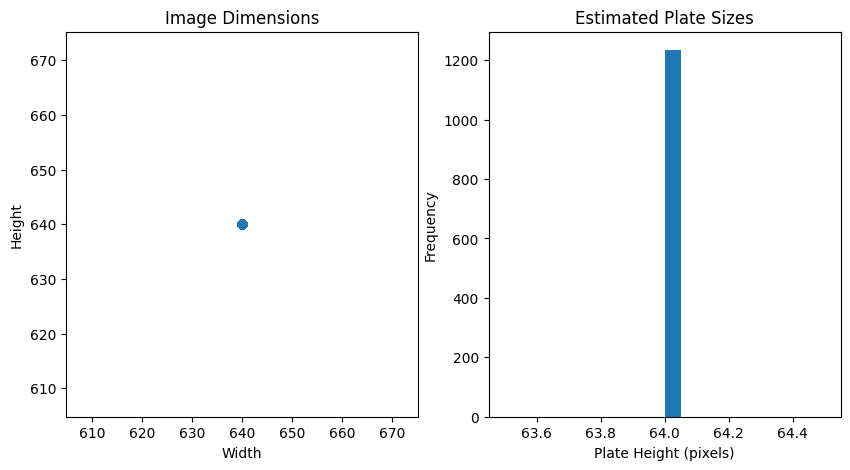

Avg Image Size: 640x640
Avg Plate Height: 64px


In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to your dataset images
image_dir = "/content/Pk-Number-Plates-3/train/images"
heights, widths, plate_heights = [], [], []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

    # (Optional) If you have annotations, extract plate height
    # Example: If plates are ~10% of image height
    plate_height_estimate = h * 0.1  # Adjust based on your data
    plate_heights.append(plate_height_estimate)

# Plot image dimensions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width"), plt.ylabel("Height")
plt.title("Image Dimensions")

# Plot plate sizes (estimated)
plt.subplot(1, 2, 2)
plt.hist(plate_heights, bins=20)
plt.xlabel("Plate Height (pixels)"), plt.ylabel("Frequency")
plt.title("Estimated Plate Sizes")
plt.show()

print(f"Avg Image Size: {sum(widths)/len(widths):.0f}x{sum(heights)/len(heights):.0f}")
print(f"Avg Plate Height: {sum(plate_heights)/len(plate_heights):.0f}px")

In [4]:
# prompt: start the training of yolov8

!pip install ultralytics

!yolo task=detect mode=train model=yolov8n.pt data=/content/data.yaml epochs=20 imgsz=640


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
# prompt: perform a testing on test data

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2135.0±527.4 MB/s, size: 59.7 KB)
val: Scanning /content/Pk-Number-Plates-3/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100% 350/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:05<00:00,  4.34it/s]
                   all        350        439      0.947      0.836      0.924      0.704
Speed: 1.9ms preprocess, 4.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val



0: 448x640 1 Number-Plate, 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


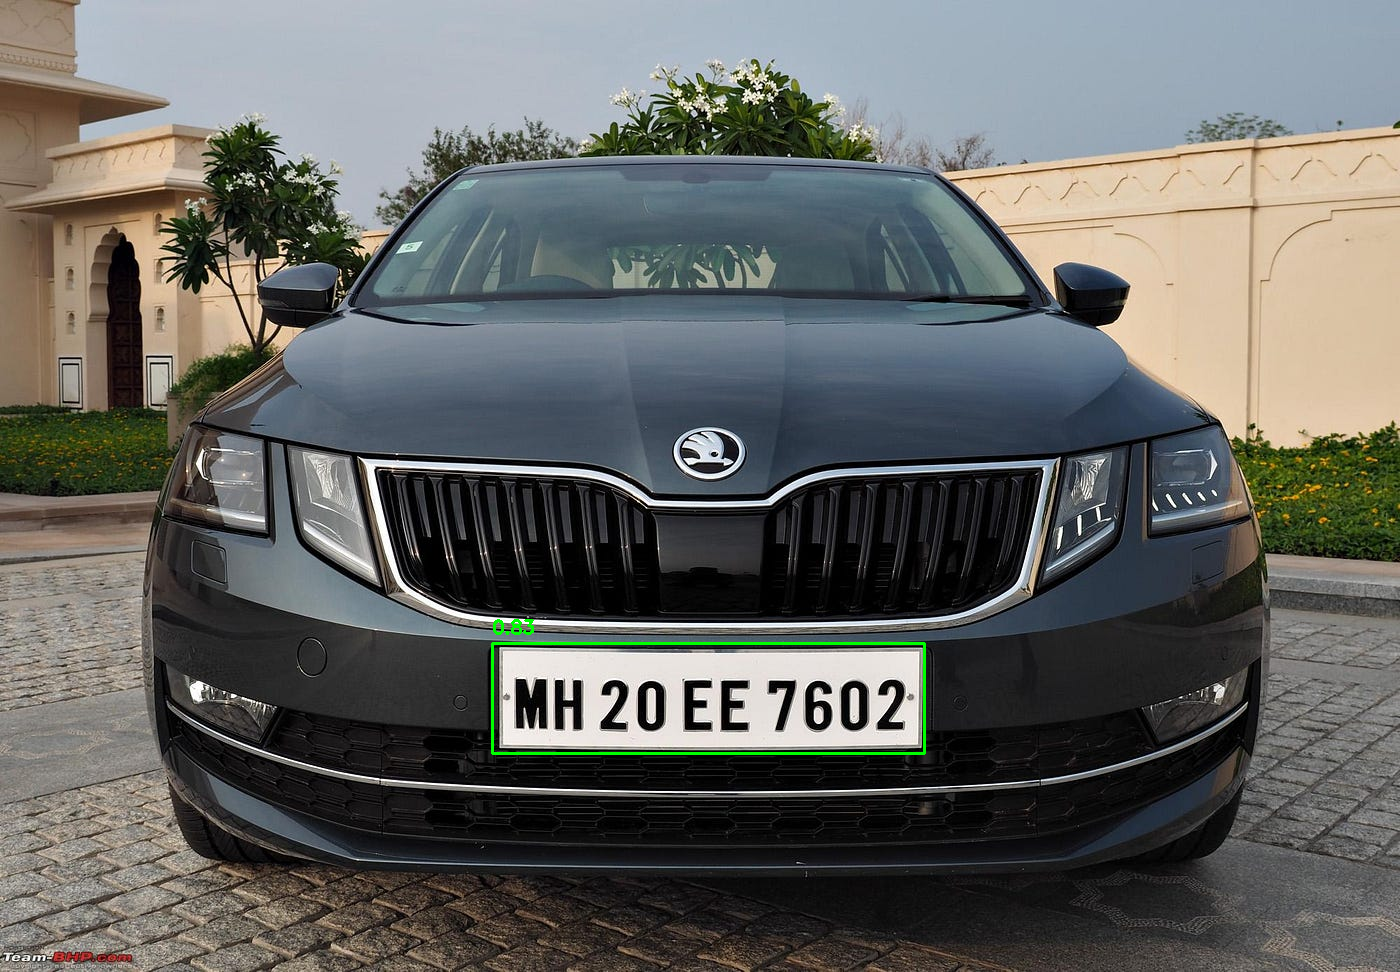

Result saved to detected_plates.jpg


In [33]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Load the image
image_path = "/content/download.jpg"
image = cv2.imread(image_path)

# Detect plates
results = model.predict(image, conf=0.38)  # Use optimal confidence threshold

# Draw bounding boxes on the image
for result in results:
    for box in result.boxes:
        # Get box coordinates in (x1, y1, x2, y2) format
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box with 2px thickness

        # Add confidence score (optional)
        confidence = round(float(box.conf[0]), 2)
        cv2.putText(image, f"{confidence}", (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the image using cv2_imshow
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

# Remove waitKey and destroyAllWindows as they are not needed with cv2_imshow
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Save the result (optional)
output_path = "detected_plates.jpg"
cv2.imwrite(output_path, image)
print(f"Result saved to {output_path}")

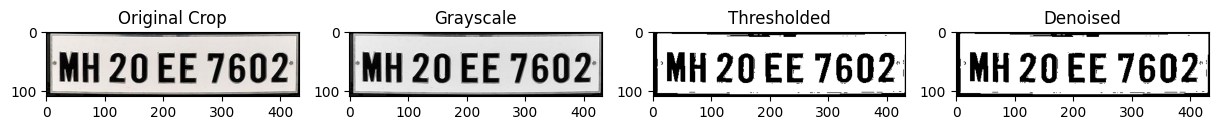

True

In [36]:
import cv2
from matplotlib import pyplot as plt  # For better visualization

# Get the first detected plate
x1, y1, x2, y2 = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
plate_img = cv2.imread("/content/download.jpg")[y1:y2, x1:x2]

# Preprocessing pipeline
gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
denoised = cv2.fastNlMeansDenoising(thresh, None, 10, 7, 21)

# Display all steps
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
plt.title("Original Crop")

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")

plt.subplot(1, 4, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")

plt.subplot(1, 4, 4)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")

plt.show()

# Save the final preprocessed image (optional)
cv2.imwrite("preprocessed_plate.jpg", denoised)

In [37]:
!pip install pytesseract
import pytesseract

# Configure Tesseract for alphanumeric characters
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(denoised, config=custom_config)

# Clean extracted text
text = "".join([c for c in text if c.isalnum()])
print("Extracted Plate:", text)

Extracted Plate: MH20EE7602
